Classificaiton Alogtithms on XOR Dataset using Perceptron, Random Forest and Multi Layer Perceptron(MLP) Model



1)
XOR DATASET with 200 data points



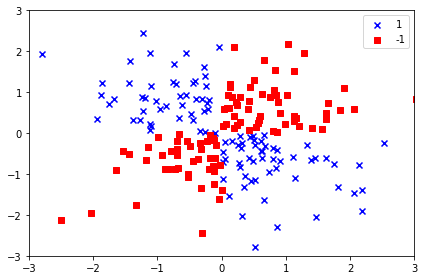

In [0]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

SPlitting the dataset into Testing and Training

In [0]:
#split the dataset into separate training and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_xor, y_xor, test_size=0.2, random_state=1, stratify=y_xor)

Linear Perceptron Model

In [0]:
#Train a perceptron model
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train, y_train)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
#Testing
from sklearn.metrics import accuracy_score
y_pred = ppn.predict(X_test)
print('Misclassified examples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))



Misclassified examples: 16
Accuracy: 0.600


In [0]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.5, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


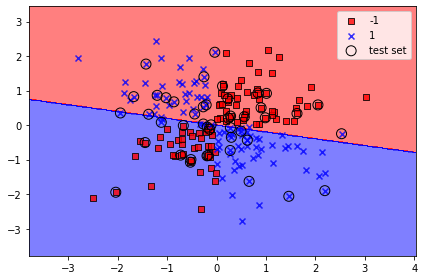

In [0]:

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))

plt.legend(loc='best')

plt.tight_layout()
#plt.savefig('images/03_01.png', dpi=300)
plt.show()

c) Random Forest Model

In [0]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=400, max_features=1)
rfc.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=1,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
#Testing
from sklearn.metrics import accuracy_score
y_pred = rfc.predict(X_test)
print('Misclassified examples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Misclassified examples: 2
Accuracy: 0.950


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


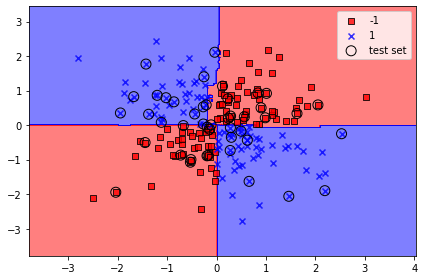

In [0]:
#PLotting the dataset
plot_decision_regions(X=X_combined, y=y_combined,
                      classifier=rfc, test_idx=range(105, 150))

plt.legend(loc='best')

plt.tight_layout()
plt.show()

d) MLP classifier Model

In [0]:
from sklearn.neural_network import MLPClassifier
#Initiliasing the model
mlp =  MLPClassifier(hidden_layer_sizes=(50,50,50),alpha=0.001)
mlp.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 50, 50), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [0]:
#Testing
from sklearn.metrics import accuracy_score
y_pred = mlp.predict(X_test)
print('Misclassified examples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Misclassified examples: 2
Accuracy: 0.950


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


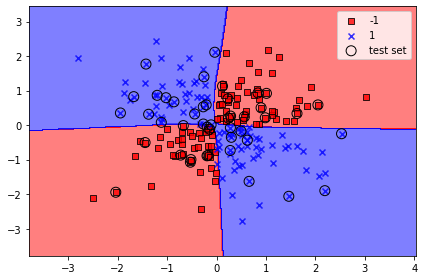

In [0]:
#PLotting the dataset
plot_decision_regions(X=X_combined, y=y_combined,
                      classifier=mlp, test_idx=range(105, 150))

plt.legend(loc='best')

plt.tight_layout()
plt.show()

2) Classification of California Housing dataset using the most common classifcation algorithms, PCA and Grid Search to identify the best classifier

In [0]:
import pandas as pd
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Step1: Let's import some cancer data from the web
df = pd.read_csv('https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv')
print(df.shape)
# Exploring the dataset
df.head()
#df.describe()
#df.isnull().sum(axis=0)

(17000, 9)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [0]:
#Sorting the dataset based on the median_House_Value
df = df.sort_values(by='median_house_value', ascending=True)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
568,-117.02,36.40,19.0,619.0,239.0,490.0,164.0,2.1000,14999.0
16643,-122.74,39.71,16.0,255.0,73.0,85.0,38.0,1.6607,14999.0
16801,-123.17,40.31,36.0,98.0,28.0,18.0,8.0,0.5360,14999.0
3226,-117.86,34.24,52.0,803.0,267.0,628.0,225.0,4.1932,14999.0
7182,-118.33,34.15,39.0,493.0,168.0,259.0,138.0,2.3667,17500.0


In [0]:
#creating a target variable with value of 1 if above mean value otherwise 0.
df['House_value'] = [1 if x > df['median_house_value'].mean() else 0 for x in df['median_house_value']]

In [0]:
#Checking the dataset
df.head()
df['House_value'].value_counts()

0    10109
1     6891
Name: House_value, dtype: int64

In [0]:
#creating the predictors and target variables
X = df.iloc[:,:8].values

y = df.iloc[:,9].values

import numpy as np
#checking values of y
print(np.unique(y))



[0 1]


In [0]:
# Step3: now, let's split our data into training and test sets
#from sklearn.cross_validation import train_test_split # this is DeprecationWarning
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    stratify=y,
                                                    random_state = 1)

print(X_train.shape, X_test.shape)

(13600, 8) (3400, 8)


Using the most common classifiers to identify the best model for classification

In [0]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


from sklearn.model_selection import cross_val_score

names = [
         #"Perceptron",
         #"LogisticRegression",
         #"Linear SVM", 
         "Decision Tree", 
         "Random Forest", 
         #"RBF SVM",          
         #"Neural Net", 
         #"Naive Bayes",  
         #"Nearest Neighbors"
         ] 

classifiers = [
   # Perceptron(),
   # LogisticRegression(),
   # SVC(kernel="linear", C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(n_estimators=400, max_features=1),
   # SVC(kernel='rbf',gamma=2, C=1),
   # MLPClassifier(hidden_layer_sizes=(100,50,50), alpha=1),
   # GaussianNB(),
   # KNeighborsClassifier(5)
   ]

for name, clf in zip(names, classifiers):
    pipe_lr = Pipeline([('scl', StandardScaler()), #For scaling the input
                   ('pca', PCA(n_components = 2)), #For compressing the data
                    ('clf', clf) ])
 
    scores = cross_val_score( estimator = pipe_lr,
                            X = X_train,
                            y = y_train,
                            cv = 5,
                            n_jobs = 1)

    print(name + '\n' + 'CV accuracy scores: %.2f +/- %.2f' %(np.mean(scores), np.std(scores)))







Decision Tree
CV accuracy scores: 0.61 +/- 0.01
Random Forest
CV accuracy scores: 0.61 +/- 0.01


To improve the acuracy of the model, I am attempting to remove the PCA components

In [0]:

names = ["Perceptron",
         "LogisticRegression",
         "Linear SVM", 
         "Decision Tree", 
         "Random Forest", 
         "RBF SVM",          
         "Neural Net", 
         "Naive Bayes",  
         "Nearest Neighbors"] 

classifiers = [
    Perceptron(),
    LogisticRegression(),
    SVC(kernel="linear", C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(n_estimators=400, max_features=1),
    SVC(kernel='rbf',gamma=2, C=1),
    MLPClassifier(hidden_layer_sizes=(100,50,50), alpha=1),
    GaussianNB(),
    KNeighborsClassifier(5)]

for name, clf in zip(names, classifiers):
    pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('clf', clf) ])
 
    scores = cross_val_score( estimator = pipe_lr,
                            X = X_train,
                            y = y_train,
                            cv = 5,
                            n_jobs = 1)

    print(name + '\n' + 'CV accuracy scores: %.3f +/- %.2f' %(np.mean(scores), np.std(scores)))


Perceptron
CV accuracy scores: 0.809 +/- 0.02
LogisticRegression
CV accuracy scores: 0.845 +/- 0.00
Linear SVM
CV accuracy scores: 0.845 +/- 0.00
Decision Tree
CV accuracy scores: 0.807 +/- 0.01
Random Forest
CV accuracy scores: 0.876 +/- 0.00
RBF SVM
CV accuracy scores: 0.865 +/- 0.00
Neural Net
CV accuracy scores: 0.867 +/- 0.00
Naive Bayes
CV accuracy scores: 0.756 +/- 0.00
Nearest Neighbors
CV accuracy scores: 0.845 +/- 0.00


Using GRid search for alogrithm selection

In [0]:
from sklearn.model_selection import GridSearchCV


gs = GridSearchCV(estimator=RandomForestClassifier(),
                    param_grid=[{'max_depth': [1,2,3,4,5,6,7,None]}],
                    scoring='accuracy',
                    cv=2)

scores = cross_val_score(gs, X_train, y_train,
                        scoring = 'accuracy', cv = 5)

print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores))) 

print(gs.fit(X_train, y_train).best_estimator_)


CV accuracy: 0.881 +/- 0.005
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


The accuracy shown now is only 88.1%

2d) PLotting the decision regions for classifiers as it is the having the highest accuracy

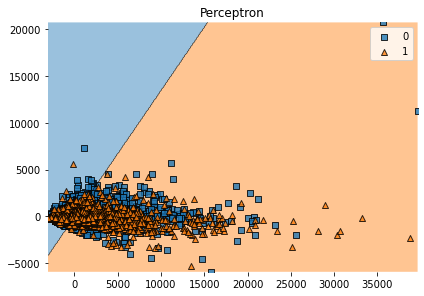

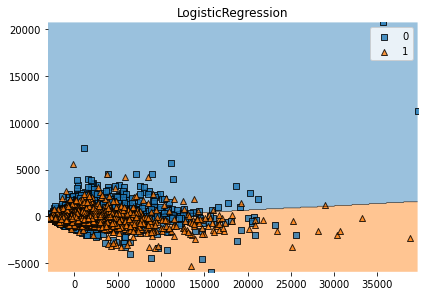

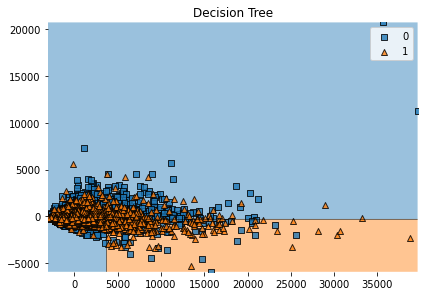

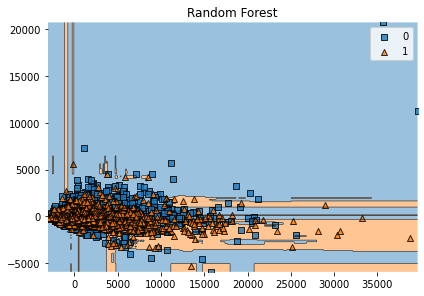

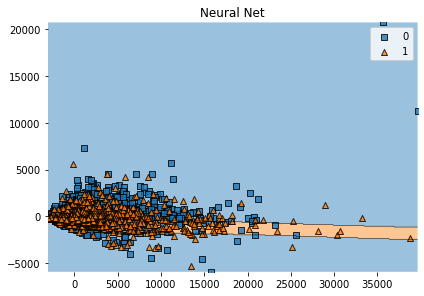

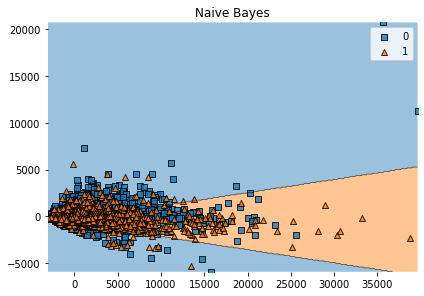

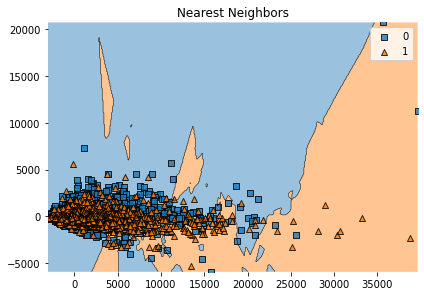

In [0]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
names = ["Perceptron",
         "LogisticRegression",
    #     "Linear SVM", 
         "Decision Tree", 
         "Random Forest", 
     #    "RBF SVM",          
        "Neural Net", 
       "Naive Bayes",  
      "Nearest Neighbors"
] 

classifiers = [
    Perceptron(),
    LogisticRegression(),
  #  SVC(kernel="linear", C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(n_estimators=400, max_features=1),
   # SVC(kernel='rbf',gamma=2, C=1),
   MLPClassifier(hidden_layer_sizes=(100,50,50), alpha=1),
   GaussianNB(),
   KNeighborsClassifier(5)
    ]


X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
i=1
for name, clf in zip(names, classifiers):
  scaler = StandardScaler()
  scaler.fit(X_train)
  pca = PCA(n_components = 2)
  X_train_2 = pca.fit_transform(X_train)
  clf.fit(X_train_2, y_train)
  X_combined_2 = pca.fit_transform(X_combined)
  plot_decision_regions(X_combined_2, y_combined, clf=clf)
  plt.legend(loc='House_value')
  plt.tight_layout()
  plt.title(name)
  plt.show()
  i +=1
